In [161]:
%matplotlib notebook
%matplotlib inline

In [162]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [163]:
# Create file paths for csv files
mouse = 'data\Mouse_metadata.csv'
study = 'data\Study_results.csv'

# Read in files from csv
mouse_df = pd.read_csv(mouse)
study_df = pd.read_csv(study)

print(mouse_df.head())
print(study_df.head())

# Merge both data sets on Mouse ID
ms_df = pd.merge(mouse_df, study_df, on='Mouse ID', how='inner')
ms_df.head()

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [164]:
# Looking for number of Mice
num_mice = study_df['Mouse ID'].nunique()
num_mice # 249 Mice

# Getting duplicate rows that occur between Mouse ID and Timepoint
dups = study_df[study_df.duplicated(['Mouse ID', 'Timepoint'])] 
# Mouse ID g989 is duplicated in the Timepoint

In [165]:
# Creating a df to store the duplicate Mouse data
dup_mouse_df = ms_df[ms_df['Mouse ID']=='g989']

In [166]:
# Cleaning the merged df from Mouse ID g989
cln_df = ms_df[ms_df['Mouse ID']!='g989']

new_num_mice = cln_df['Mouse ID'].nunique()
new_num_mice # 248 Mice

248

In [7]:
# Finding summary statistics for the mouse study
sum_stat = cln_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
sum_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

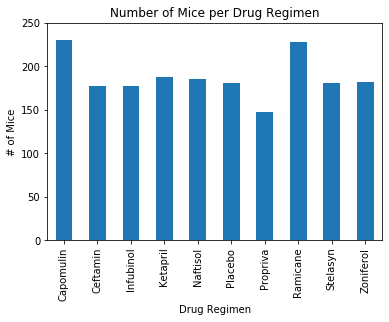

In [167]:
# Generating a new dataframe that groups mice by drug and counts by Mouse ID
mice = cln_df.groupby('Drug Regimen')['Mouse ID'].count()

# Generating a bar plot of number of mice for each Regimen in pandas
mice.plot(kind='bar', title='Number of Mice per Drug Regimen')
plt.ylabel('# of Mice')
plt.ylim(0, 250)
plt.show()

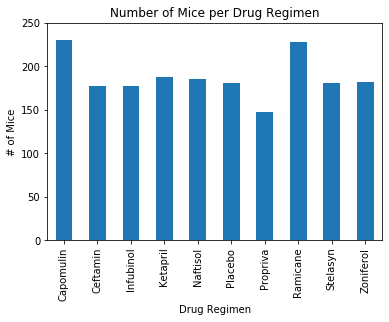

In [168]:
# Generating a bar plot of number of mice for each Regimen in pyplot
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, align='center', width=0.5)
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')
ticks=[value for value in x_axis]
plt.xticks(ticks, mice.index.array, rotation=90)
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, 250)
plt.show()

In [188]:
# Calculating the number of Females and Males in the study
sex = cln_df.groupby('Sex')['Mouse ID'].nunique()

Text(0, 0.5, '')

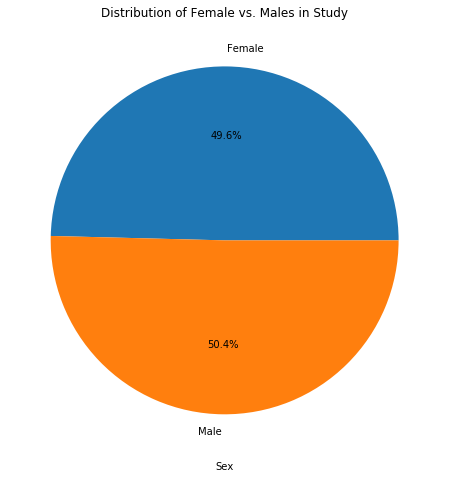

In [189]:
# Generating a pie plot to show the distribution of the females vs males in the study in pandas
plt.figure(figsize=(16,8))
ax1 = plt.subplot()
sex.plot(kind='pie',y='Sex', ax=ax1,title='Distribution of Female vs. Males in Study', autopct='%1.1f%%', legend=False)
plt.xlabel('Sex')
plt.ylabel('')

Text(0.5, 0, 'Sex')

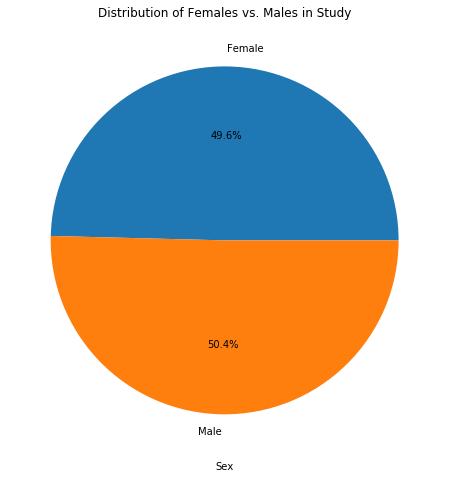

In [190]:
# Generating a pie plot to show distribustion females vs males in pyplot
plt.figure(figsize=(16,8))
ax1 = plt.subplot()
plt.pie(sex, labels=sex.index.array, autopct='%1.1f%%')
ax1.set_title('Distribution of Females vs. Males in Study')
plt.xlabel('Sex')

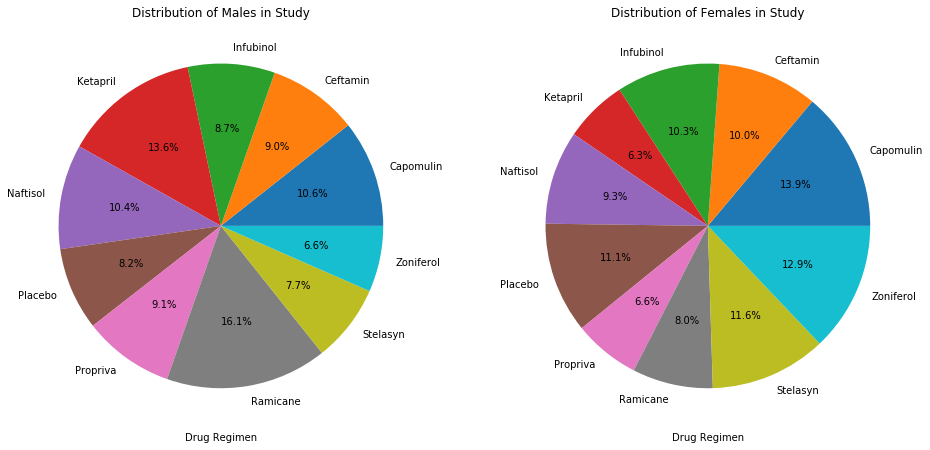

In [191]:
# Generating a pie plot to show distribustion mice for each gender in pandas
male = cln_df[cln_df['Sex']=='Male'].groupby('Drug Regimen').count()
male = male.drop(male.columns[1:7], axis=1)

female = cln_df[cln_df['Sex']=='Female'].groupby('Drug Regimen').count()
female = female.drop(female.columns[1:7], axis=1)

plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
male.plot(kind='pie',y='Mouse ID', ax=ax1,title='Distribution of Males in Study', autopct='%1.1f%%', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('')

ax2 = plt.subplot(122)
female.plot(kind='pie',y='Mouse ID', ax=ax2,title='Distribution of Females in Study', autopct='%1.1f%%', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('')
plt.show()

C:\Users\dmbor\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
C:\Users\dmbor\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


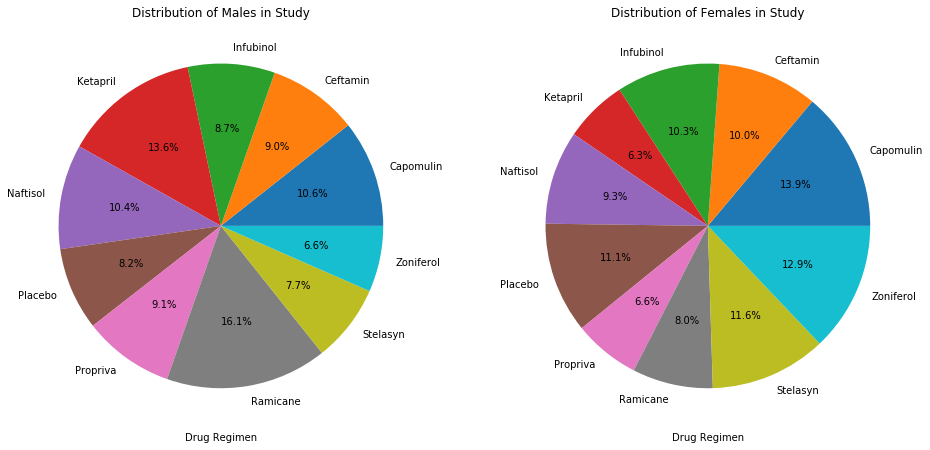

In [192]:
# Generating a pie plot to show distribustion mice for each gender in pyplot
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
plt.pie(male, labels=male.index.array, autopct='%1.1f%%')
ax1.set_title('Distribution of Males in Study')
plt.xlabel('Drug Regimen')

ax2 = plt.subplot(122)
plt.pie(female, labels=female.index.array, autopct='%1.1f%%')
ax2.set_title('Distribution of Females in Study')
plt.xlabel('Drug Regimen')
plt.show()

In [193]:
# most promising treatments
top_drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [194]:
# Calculate the final tumor volume for each mouse accross the 4 most promising treatments
ms_tmr = cln_df.groupby('Mouse ID')['Timepoint'].last()
ms_tmr_sz=pd.merge(ms_tmr, cln_df, on='Timepoint', how='left')

In [201]:
tp_four = ms_tmr_sz[ms_tmr_sz['Drug Regimen'].isin(top_drug)]
tp_four = tp_four.loc[:,['Mouse ID','Drug Regimen','Tumor Volume (mm3)']].sort_values('Drug Regimen')
tp_four
tp_four = tp_four.pivot(columns='Drug Regimen', values='Tumor Volume (mm3)')
tp_four

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
0,NaN,NaN,NaN,22.050126
1,23.343598,NaN,NaN,NaN
2,28.484033,NaN,NaN,NaN
3,28.430964,NaN,NaN,NaN
4,NaN,NaN,NaN,29.128472
...,...,...,...,...
39987,NaN,61.386660,NaN,NaN
39988,NaN,NaN,67.685569,NaN
39991,NaN,68.594745,NaN,NaN
39992,NaN,64.729837,NaN,NaN


In [199]:
# Calculating and printing the quartiles, iqr, and potential outliers
for drug in top_drug:
    
    quartiles = tp_four[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} is: {round(lowerq,2)}")
    print(f"The upper quartile of {drug} is: {round(upperq,2)}")
    print(f"The interquartile range of {drug} is: {round(iqr,2)}")
    print(f"The the median of {drug} is: {round(quartiles[0.5],2)} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.\n")


The lower quartile of Capomulin is: 35.46
The upper quartile of Capomulin is: 43.23
The interquartile range of Capomulin is: 7.77
The the median of Capomulin is: 38.98 
Values below 23.81 could be outliers.
Values above 54.88 could be outliers.

The lower quartile of Ramicane is: 33.56
The upper quartile of Ramicane is: 43.05
The interquartile range of Ramicane is: 9.49
The the median of Ramicane is: 38.26 
Values below 19.33 could be outliers.
Values above 57.28 could be outliers.

The lower quartile of Infubinol is: 49.27
The upper quartile of Infubinol is: 64.14
The interquartile range of Infubinol is: 14.87
The the median of Infubinol is: 56.52 
Values below 26.97 could be outliers.
Values above 86.44 could be outliers.

The lower quartile of Ceftamin is: 49.41
The upper quartile of Ceftamin is: 63.47
The interquartile range of Ceftamin is: 14.06
The the median of Ceftamin is: 59.21 
Values below 28.31 could be outliers.
Values above 84.56 could be outliers.



(0, 80)

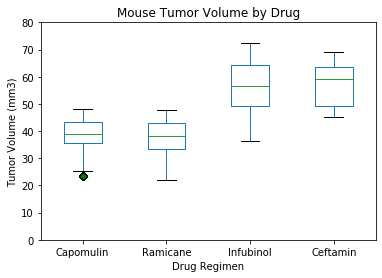

In [98]:
# Generating a box and whisker plot for the top four drug treatments
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax1 = plt.subplots()
tp_four.boxplot(column=top_drug, grid=False, flierprops=green_diamond)
ax1.set_title('Mouse Tumor Volume by Drug')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylim(0,80)

(25, 50)

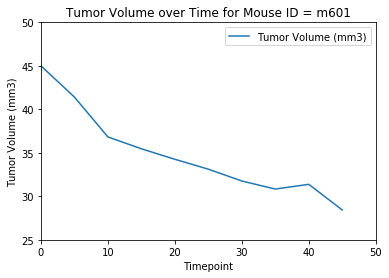

In [202]:
# Pulling data for the Mouse ID m601 on the Capomulin treatment
cap_ms = cln_df[cln_df['Mouse ID']=='m601']
cap_ms = cap_ms.loc[:,['Timepoint','Tumor Volume (mm3)']]
cap_ms

# Generating a line plot for Mouse ID m601 for Tumor Volume over time
cap_ms.plot(kind='line',x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Tumor Volume over Time for Mouse ID = m601')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,50)
plt.ylim(25,50)

(35, 45)

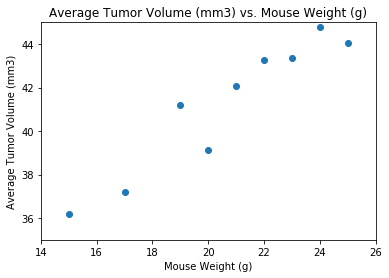

In [203]:
# Pulling data for drug regimen Capomulin, mouse weight and avg tumor volume
cap_reg = cln_df[cln_df['Drug Regimen']=='Capomulin']
cap_reg = cap_reg.loc[:,['Weight (g)','Tumor Volume (mm3)']].groupby('Weight (g)').mean()

# Setting x and y values for plotting
weight = cap_reg.index
volume = cap_reg.iloc[:,0]

# Creating a scatter plot of avg tumor volume vs mouse weight for Capomulin
plt.scatter(weight, volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.xlim(14,26)
plt.ylim(35,45)

In [204]:
# Calculating the correlation coefficient
cap_corr = st.pearsonr(weight,volume)[0]
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(weight,volume)[0],2)}")

The correlation coefficient between mouse weight and tumor volume is 0.95


In [205]:
# Calculating the linear regression line of the x,y scatter
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(weight, volume)

In [206]:
# Using linear regression values to calculate and linear regression line
cap_fit = cap_slope * weight + cap_int

Text(22, 41.5, 'R-squared = 0.95')

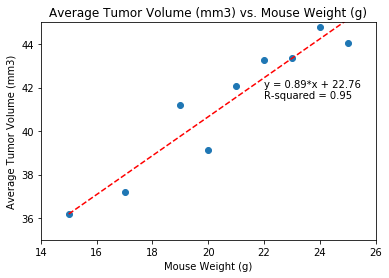

In [207]:
# Regenerating the x,y scatter and adding the linear regression line to the chart
plt.scatter(weight, volume)
plt.plot(weight,cap_fit,'--', c='r')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.xlim(14,26)
plt.ylim(35,45)
plt.text(22,42,f'y = {round(cap_slope,2)}*x + {round(cap_int,2)}')
plt.text(22,41.5,f'R-squared = {round(cap_corr,2)}')